# Árvore de Decisão - Classificação

## 🧠 O que é?

Uma **árvore de decisão** é um modelo de *machine learning* que aprende regras de **“se... então...”** para tomar decisões e classificar dados.

É como um **fluxograma** — você vai respondendo perguntas (nós da árvore) até chegar a uma decisão final (folha da árvore).

---

## 🌼 Exemplo simples

Imagine que queremos ensinar o modelo a classificar flores como:

- 🌹 **Rosa**  
- 🌻 **Girassol**  
- 🌷 **Tulipa**

E temos dados como:

- Tamanho da pétala  
- Cor  
- Altura da flor  

A árvore vai aprender perguntas do tipo:

> A cor é amarela?  
> 👉 Sim → Pode ser **Girassol**  
> 👉 Não → Vá para a próxima pergunta  

> A pétala é curta?  
> 👉 Sim → Pode ser **Tulipa**  
> 👉 Não → Pode ser **Rosa**

Essas perguntas são escolhidas **automaticamente** pelo algoritmo, com base nos dados de treino.

---

## ⚙️ Como ela aprende

O algoritmo analisa todos os dados e tenta encontrar os **melhores pontos de corte** que dividem os dados em grupos mais puros (ou seja, com exemplos de uma mesma classe).

Para medir isso, ele usa critérios como:

- **Gini** (*impureza de Gini*)  
- **Entropia** (*da teoria da informação*)

---

## 📊 Como é usada

Depois de treinada, a árvore consegue **classificar novos dados** respondendo as mesmas perguntas.  
Por exemplo:

> “Se a flor é amarela e tem pétalas longas → Girassol 🌻”

---

## ✅ Vantagens

- Fácil de entender e visualizar  
- Funciona bem com dados mistos (números e categorias)  
- Rápida para treinar e prever  

---

## ⚠️ Desvantagens

- Pode **decorar demais os dados** (*overfitting*) se for muito profunda  
- **Pequenas mudanças** nos dados podem mudar muito a árvore  

---

## 💡 Em resumo

A **árvore de decisão** é como um **conjunto de perguntas em sequência** que o computador aprende sozinho para **classificar algo da melhor forma possível**.


## ⚙️ Exemplo de Código

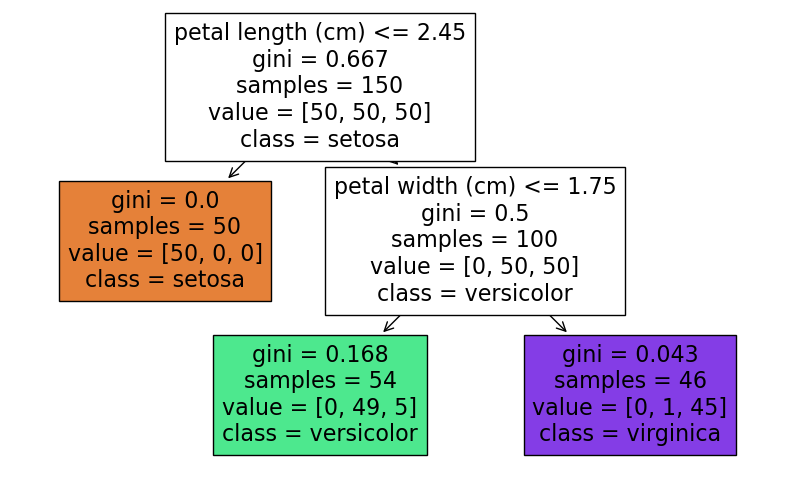

In [13]:
# Importar bibliotecas
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 1. Carrega o conjunto de dados Iris (flores)
iris = load_iris()

# 2. Cria e treina o modelo de árvore de decisão
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(iris.data, iris.target)

# 3. Mostra a árvore graficamente
plt.figure(figsize=(10, 6))
plot_tree(tree_clf,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True)
plt.show()


## 🌳 Quando olhamos para uma árvore de decisão...

Cada “caixinha” (ou **nó**) tem algumas informações importantes:

---

### 1️⃣ `samples`

👉 Diz **quantos exemplos (ou dados de treino)** chegaram até aquele nó.  
É como contar quantas flores estão sendo analisadas naquele ponto da árvore.

---

### 2️⃣ `value`

👉 Mostra **quantas amostras de cada classe** estão nesse nó.  

Por exemplo, se estamos classificando 3 tipos de flores (*setosa*, *versicolor* e *virginica*), pode aparecer assim:

$$
value = [49, 5, 0]
$$


Isso quer dizer:

- 49 são da primeira classe  
- 5 da segunda  
- 0 da terceira  

Ou seja, esse nó tem **54 flores no total** (`samples = 54`).

---

### 3️⃣ `gini`

👉 Mede o quão **“misturados”** estão os dados dentro do nó.  
É chamado de **impureza de Gini**.

- Se o nó tem **só uma classe** (todas as flores iguais) → é puro → `gini = 0`  
- Se o nó tem **várias classes misturadas** → é impuro → `gini` fica maior que 0  

---

### ⚙️ Fórmula da impureza de Gini

$$
G_i = 1 - \sum_{k=1}^{n} (p_{i,k})^2
$$

Onde:  
- \( p_{i,k} \) é a **proporção de amostras da classe \(k\)** no nó \(i\)  
  (ou seja, quantas daquela classe dividido pelo total do nó)

---

### 🌼 Exemplo prático

No nó temos **54 flores** no total:

- 49 da classe 1  
- 5 da classe 2  
- 0 da classe 3  

Proporções:

- Classe 1 → 49/54  
- Classe 2 → 5/54  
- Classe 3 → 0/54  

Aplicando na fórmula:

$$
G_i = 1 - (0/54)^2 - (49/54)^2 - (5/54)^2 \approx 0.168
$$

🔹 Isso significa que o nó ainda tem **um pouco de mistura** (não é 100% puro),  
mas a maioria é da classe 1 (49 de 54), então o valor de Gini é **baixo**.

---

### 💡 Em resumo:

| Termo   | Significado simples |
|----------|---------------------|
| `samples` | Quantas amostras chegaram no nó |
| `value`   | Quantas de cada classe estão ali |
| `gini`    | Mede o quanto o nó está “misturado” (quanto menor, mais puro) |


## 🧩 Modelos Caixa Branca (White Box)

As **Árvores de Decisão** são intuitivas, e suas decisões são **fáceis de interpretar**.  
Elas fornecem **regras de classificação simples** que podem até ser aplicadas manualmente.

### 🧩 Objetivo

Criar uma **árvore de decisão simples** que classifica pessoas em **“adultos”** ou **“jovens”** com base em **idade** e **salário**.

Assim conseguimos entender e até aplicar **manualmente** as regras aprendidas — característica principal dos **modelos caixa branca**.


🌳 Regras aprendidas pela árvore de decisão:

|--- idade <= 23.50
|   |--- class: jovem
|--- idade >  23.50
|   |--- class: adulto


🔎 Testando novos casos:
👤 Caso 1: idade=19, salário=1.1 mil R$ → classe prevista: jovem
   Probabilidades: {'adulto': 0.0, 'jovem': 1.0}
👤 Caso 2: idade=23, salário=2.0 mil R$ → classe prevista: jovem
   Probabilidades: {'adulto': 0.0, 'jovem': 1.0}
👤 Caso 3: idade=37, salário=5.0 mil R$ → classe prevista: adulto
   Probabilidades: {'adulto': 1.0, 'jovem': 0.0}
👤 Caso 4: idade=50, salário=8.0 mil R$ → classe prevista: adulto
   Probabilidades: {'adulto': 1.0, 'jovem': 0.0}

📊 Acurácia no conjunto de teste: 100.0%


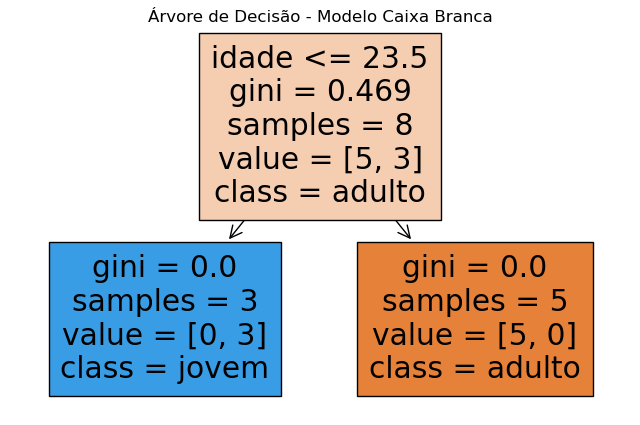

In [17]:
# Importar bibliotecas
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Criar um conjunto de dados simples
dados = {
    "idade":   [15, 18, 20, 22, 25, 28, 30, 35, 40, 45, 50, 55],
    "salario": [0.5, 1.0, 1.2, 1.8, 2.5, 3.5, 4.5, 5.5, 6.0, 7.0, 8.0, 9.0],
    "classe":  ["jovem", "jovem", "jovem", "jovem", "adulto", "adulto",
                "adulto", "adulto", "adulto", "adulto", "adulto", "adulto"]
}

df = pd.DataFrame(dados)

# 2️⃣ Separar dados em entrada (X) e saída (y)
X = df[["idade", "salario"]]
y = df["classe"]

# 3️⃣ Dividir em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# 4️⃣ Criar e treinar o modelo
modelo = DecisionTreeClassifier(max_depth=2, random_state=42)
modelo.fit(X_treino, y_treino)

# 5️⃣ Mostrar as regras aprendidas pela árvore
print("🌳 Regras aprendidas pela árvore de decisão:\n")
regras = export_text(modelo, feature_names=list(X.columns))
print(regras)

# 6️⃣ Testar o modelo com novos casos
novos_casos = pd.DataFrame({
    "idade": [19, 23, 37, 50],
    "salario": [1.1, 2.0, 5.0, 8.0]
})

# 7️⃣ Previsões das classes
previsoes = modelo.predict(novos_casos)

# 8️⃣ Previsões das probabilidades
probabilidades = modelo.predict_proba(novos_casos).round(3)

# 9️⃣ Mostrar resultados
print("\n🔎 Testando novos casos:")
for i, (idade, salario) in enumerate(zip(novos_casos.idade, novos_casos.salario)):
    print(f"👤 Caso {i+1}: idade={idade}, salário={salario} mil R$ → classe prevista: {previsoes[i]}")
    print("   Probabilidades:", dict(zip(modelo.classes_, probabilidades[i])))

# 10️⃣ Avaliar o desempenho no conjunto de teste
acuracia = modelo.score(X_teste, y_teste)
print(f"\n📊 Acurácia no conjunto de teste: {acuracia*100:.1f}%")

# 11️⃣ Mostrar a árvore graficamente (sem emoji no título)
plt.figure(figsize=(8, 5))
plot_tree(modelo, feature_names=["idade", "salario"], class_names=modelo.classes_, filled=True)
plt.title("Árvore de Decisão - Modelo Caixa Branca")
plt.show()


## 🧩 Modelos Caixa Preta (Black Box)

Em contraste, as **Random Forests** ou **redes neurais** são geralmente consideradas **modelos de caixa preta**.  
Eles fazem **ótimas previsões**, mas geralmente é **difícil explicar em termos simples** por que as previsões foram feitas.

### 🧠 Explicação simples do Código de Random Forest abaixo:

- **Random Forest** é uma **coleção de várias árvores de decisão**.  
- Faz **previsões mais precisas** do que uma única árvore, mas é **difícil de interpretar**.

O modelo fornece:

- **`predict`** → classe prevista  
- **`predict_proba`** → probabilidade de cada classe  

Diferente da árvore simples (**caixa branca**), **não conseguimos facilmente escrever regras simples** como:

> “se idade ≤ 21 → jovem”

Porque o modelo combina **centenas de árvores** e critérios internos.


In [18]:
# Importar bibliotecas
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 1️⃣ Criar um conjunto de dados simples
dados = {
    "idade":   [15, 18, 20, 22, 25, 28, 30, 35, 40, 45, 50, 55],
    "salario": [0.5, 1.0, 1.2, 1.8, 2.5, 3.5, 4.5, 5.5, 6.0, 7.0, 8.0, 9.0],
    "classe":  ["jovem", "jovem", "jovem", "jovem", "adulto", "adulto",
                "adulto", "adulto", "adulto", "adulto", "adulto", "adulto"]
}

df = pd.DataFrame(dados)

# 2️⃣ Separar dados em entrada (X) e saída (y)
X = df[["idade", "salario"]]
y = df["classe"]

# 3️⃣ Dividir em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# 4️⃣ Criar e treinar o modelo Random Forest
rf_modelo = RandomForestClassifier(n_estimators=100, random_state=42)
rf_modelo.fit(X_treino, y_treino)

# 5️⃣ Testar o modelo com novos casos
novos_casos = pd.DataFrame({
    "idade": [19, 23, 37, 50],
    "salario": [1.1, 2.0, 5.0, 8.0]
})

# 6️⃣ Previsões das classes
previsoes = rf_modelo.predict(novos_casos)

# 7️⃣ Previsões das probabilidades
probabilidades = rf_modelo.predict_proba(novos_casos).round(3)

# 8️⃣ Mostrar resultados
print("🔎 Testando novos casos com Random Forest (caixa preta):")
for i, (idade, salario) in enumerate(zip(novos_casos.idade, novos_casos.salario)):
    print(f"👤 Caso {i+1}: idade={idade}, salário={salario} mil R$ → classe prevista: {previsoes[i]}")
    print("   Probabilidades:", dict(zip(rf_modelo.classes_, probabilidades[i])))

# 9️⃣ Avaliar desempenho no conjunto de teste
acuracia = rf_modelo.sc# Importar bibliotecas
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 1️⃣ Criar um conjunto de dados simples
dados = {
    "idade":   [15, 18, 20, 22, 25, 28, 30, 35, 40, 45, 50, 55],
    "salario": [0.5, 1.0, 1.2, 1.8, 2.5, 3.5, 4.5, 5.5, 6.0, 7.0, 8.0, 9.0],
    "classe":  ["jovem", "jovem", "jovem", "jovem", "adulto", "adulto",
                "adulto", "adulto", "adulto", "adulto", "adulto", "adulto"]
}

df = pd.DataFrame(dados)

# 2️⃣ Separar dados em entrada (X) e saída (y)
X = df[["idade", "salario"]]
y = df["classe"]

# 3️⃣ Dividir em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# 4️⃣ Criar e treinar o modelo Random Forest
rf_modelo = RandomForestClassifier(n_estimators=100, random_state=42)
rf_modelo.fit(X_treino, y_treino)

# 5️⃣ Testar o modelo com novos casos
novos_casos = pd.DataFrame({
    "idade": [19, 23, 37, 50],
    "salario": [1.1, 2.0, 5.0, 8.0]
})

# 6️⃣ Previsões das classes
previsoes = rf_modelo.predict(novos_casos)

# 7️⃣ Previsões das probabilidades
probabilidades = rf_modelo.predict_proba(novos_casos).round(3)

# 8️⃣ Mostrar resultados
print("🔎 Testando novos casos com Random Forest (caixa preta):")
for i, (idade, salario) in enumerate(zip(novos_casos.idade, novos_casos.salario)):
    print(f"👤 Caso {i+1}: idade={idade}, salário={salario} mil R$ → classe prevista: {previsoes[i]}")
    print("   Probabilidades:", dict(zip(rf_modelo.classes_, probabilidades[i])))

# 9️⃣ Avaliar desempenho no conjunto de teste
acuracia = rf_modelo.score(X_teste, y_teste)
print(f"\n📊 Acurácia no conjunto de teste: {acuracia*100:.1f}%")
ore(X_teste, y_teste)
print(f"\n📊 Acurácia no conjunto de teste: {acuracia*100:.1f}%")


🔎 Testando novos casos com Random Forest (caixa preta):
👤 Caso 1: idade=19, salário=1.1 mil R$ → classe prevista: jovem
   Probabilidades: {'adulto': 0.03, 'jovem': 0.97}
👤 Caso 2: idade=23, salário=2.0 mil R$ → classe prevista: jovem
   Probabilidades: {'adulto': 0.29, 'jovem': 0.71}
👤 Caso 3: idade=37, salário=5.0 mil R$ → classe prevista: adulto
   Probabilidades: {'adulto': 1.0, 'jovem': 0.0}
👤 Caso 4: idade=50, salário=8.0 mil R$ → classe prevista: adulto
   Probabilidades: {'adulto': 1.0, 'jovem': 0.0}

📊 Acurácia no conjunto de teste: 100.0%


## 🌳 Árvores de Decisão com CART (Scikit-Learn)

### O que é CART?

- **CART** = **Classification and Regression Tree**  
- É o algoritmo que o **Scikit-Learn** usa para criar árvores de decisão (tanto para **classificar** quanto para **prever valores**).

---

### Como ele divide os dados?

1. Pega uma **única feature** (k), como o comprimento da pétala de uma flor.  
2. Define um **limiar (tk)**, por exemplo:  
   > “comprimento da pétala ≤ 2.45 cm”  
3. Divide os dados em **dois grupos** com base nessa regra.

---

### Como escolhe qual feature e limiar usar?

- Tenta todas as combinações possíveis \((k, t_k)\)  
- Escolhe aquela que deixa os grupos mais **puros** (ou seja, com mais exemplos de uma mesma classe)  
- O **tamanho do grupo também conta**: grupos maiores têm mais peso

---

### 📏 Fórmula simplificada da “impureza ponderada”:

\[
J(k, t_k) = \frac{m_{\text{esquerdo}}}{m} G_{\text{esquerdo}} + \frac{m_{\text{direito}}}{m} G_{\text{direito}}
\]

Onde:  

- \( m_{\text{esquerdo}}, m_{\text{direito}} \) → quantidade de exemplos em cada grupo  
- \( m \) → total de exemplos no nó  
- \( G_{\text{esquerdo}}, G_{\text{direito}} \) → impureza de Gini em cada grupo  

O algoritmo escolhe \((k, t_k)\) que **minimiza \(J(k, t_k)\)**.

---

### Recursão e parada

- Depois de dividir um nó, ele **repete o processo** nos nós filhos.  
- Para de dividir se:  
  - Alcançou a **profundidade máxima** (`max_depth`)  
  - Não consegue mais **reduzir a impureza**

---

### CART é guloso (greedy)

- Escolhe a **melhor divisão no nível atual** sem se preocupar se isso será ótimo para os níveis seguintes  
- Não encontra a árvore perfeita globalmente, apenas uma **boa árvore local**

#### Por que é difícil encontrar a árvore perfeita?

- Minimizar a impureza total globalmente é **NP-Completo** → computacionalmente impraticável para muitos dados  
- Por isso, o **CART usa abordagem gulosa**, que é rápida e funciona bem na prática

---

### 💡 Resumindo em palavras simples

- CART constrói a árvore perguntando:  
  > “qual feature e limite dividem melhor os dados agora?”  
- Repete isso para cada grupo, **parando quando a árvore fica profunda demais** ou não dá para melhorar  
- Ele é **guloso**, não olha todas as possibilidades futuras, mas mesmo assim costuma **dar boas previsões**

### 💻 Código abaixo em Python para visualizar CART

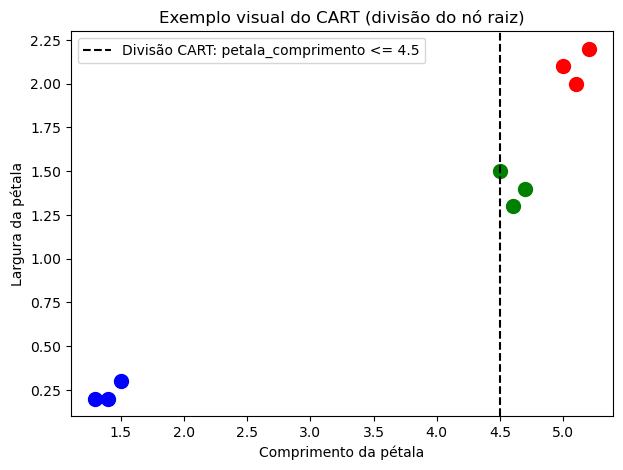

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Criar um conjunto de dados simples: flores (altura x comprimento da pétala)
dados = {
    "petala_comprimento": [1.4, 1.3, 1.5, 4.5, 4.7, 4.6, 5.1, 5.0, 5.2],
    "petala_largura": [0.2, 0.2, 0.3, 1.5, 1.4, 1.3, 2.0, 2.1, 2.2],
    "classe": ["setosa", "setosa", "setosa", "versicolor", "versicolor", "versicolor", "virginica", "virginica", "virginica"]
}

df = pd.DataFrame(dados)

# Dividir manualmente com base em "petala_comprimento <= 4.5"
grupo1 = df[df["petala_comprimento"] <= 4.5]
grupo2 = df[df["petala_comprimento"] > 4.5]

# Plotar os dados
plt.figure(figsize=(7,5))
cores = {"setosa": "blue", "versicolor": "green", "virginica": "red"}

# Pontos originais
for i, row in df.iterrows():
    plt.scatter(row["petala_comprimento"], row["petala_largura"], color=cores[row["classe"]], s=100)

# Linha de divisão escolhida pelo CART
plt.axvline(x=4.5, color='black', linestyle='--', label='Divisão CART: petala_comprimento <= 4.5')

plt.xlabel("Comprimento da pétala")
plt.ylabel("Largura da pétala")
plt.title("Exemplo visual do CART (divisão do nó raiz)")
plt.legend()
plt.show()


## ⚙️ Principais parâmetros (explicados de forma simples)

### 1. `criterion`

Define como a árvore mede a qualidade da divisão (ou seja, como decide onde cortar os dados).

- `"gini"` → usa o **índice de Gini** (métrica padrão, mede impureza)  
- `"entropy"` → usa a **entropia** (baseada em informação)  
- `"log_loss"` → usa a **perda logarítmica** (mais usada em probabilidades modernas)

👉 **Exemplo:**

```python
DecisionTreeClassifier(criterion="entropy")


### 2. `splitter`

Controla como os pontos de corte (divisões) são escolhidos.

- `"best"` → escolhe o **melhor ponto de corte** (mais usado)  
- `"random"` → escolhe **pontos de corte aleatórios** (útil em florestas aleatórias)

👉 **Exemplo:**

```python
DecisionTreeClassifier(splitter="best")


### 3. `max_depth`

Define a **profundidade máxima da árvore** (quantos níveis ela pode ter).

- **Valor padrão:** `None` → cresce até todos os nós serem puros (pode causar *overfitting*)  
- Use um número (ex: `max_depth=5`) para **limitar e evitar overfitting**

👉 **Exemplo:**

```python
DecisionTreeClassifier(max_depth=5)


### 4. `min_samples_split`

Define o **número mínimo de amostras necessárias para dividir um nó**.

- **Padrão:** `2`  
- **Valores maiores** → menos divisões → **árvore mais simples**

👉 **Exemplo:**

```python
DecisionTreeClassifier(min_samples_split=10)


### 5. `min_samples_leaf`

Define o **número mínimo de amostras em uma folha** (nó final).

- **Evita** criar folhas com poucos exemplos.  
- **Valores maiores** → árvore mais **generalista**.

👉 **Exemplo:**

```python
DecisionTreeClassifier(min_samples_leaf=5)


### 6. `max_features`

Define o **número de features (colunas)** usadas para fazer as divisões.

- `"auto"` ou `"sqrt"` → usa √(número total de features)  
- `"log2"` → usa log₂(número total de features)  
- `None` → usa todas as features

👉 **Exemplo:**

```python
DecisionTreeClassifier(max_features="sqrt")


### 7. `random_state`

Garante **resultados reproduzíveis** (fixa a aleatoriedade).

👉 **Exemplo:**

```python
DecisionTreeClassifier(random_state=42)


### 8. `max_leaf_nodes`

Define o **número máximo de folhas (finais)** da árvore.

- Controla o **tamanho da árvore**  
- `None` → sem limite

👉 **Exemplo:**

```python
DecisionTreeClassifier(max_leaf_nodes=10)


### 9. `min_impurity_decrease`

Define o **quanto a impureza deve diminuir** para permitir uma divisão.

- Evita divisões pouco úteis  
- Exemplo: `0.01` significa que o nó só é dividido se reduzir a impureza em pelo menos 1%

👉 **Exemplo:**

```python
DecisionTreeClassifier(min_impurity_decrease=0.01)


### 10. `class_weight`

Ajusta o peso das classes (útil quando há classes desbalanceadas).

"balanced" → ajusta automaticamente conforme a frequência das classes

Ou use um dicionário, ex: {0: 1, 1: 5} (classe 1 vale 5× mais)

👉 Exemplo:

DecisionTreeClassifier(class_weight="balanced")

### 11. `ccp_alpha`

Controla a **poda da árvore** (*Complexity Pruning*).

- Valores maiores → árvore mais **podada** (menor e mais simples)  
- **Padrão:** `0.0` → sem poda

👉 **Exemplo:**

```python
DecisionTreeClassifier(ccp_alpha=0.01)


## 🌱 Resumo rápido (pra decorar)

| Parâmetro              | Serve para...                 | Dica                              |
|------------------------|-------------------------------|----------------------------------|
| `criterion`            | medir qualidade da divisão     | use `"gini"` ou `"entropy"`       |
| `splitter`             | escolher o tipo de divisão     | `"best"` é o comum                |
| `max_depth`            | limitar profundidade           | evita overfitting                 |
| `min_samples_split`    | mínimo pra dividir             | ↑ = árvore mais simples           |
| `min_samples_leaf`     | mínimo por folha               | ↑ = generaliza mais               |
| `max_features`         | nº de features por divisão     | ajuda na aleatoriedade            |
| `random_state`         | reprodutibilidade              | sempre fixe (ex: 42)             |
| `max_leaf_nodes`       | nº máx. de folhas              | controla tamanho                  |
| `min_impurity_decrease`| impureza mínima                | evita divisões inúteis            |
| `class_weight`         | ajustar pesos das classes      | útil pra dados desbalanceados     |
| `ccp_alpha`            | poda final                     | deixa a árvore mais limpa         |


## ⚙️ Explicação do Codigo de Árvore de Decisão (Classificação) do Git do Colab Notebook "Hands-on Machine Learning, 3rd edition"

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Carrega o dataset Iris e armazena em iris.
# — as_frame=True pede que os dados sejam retornados como um pandas.DataFrame (em vez de apenas arrays
# NumPy),o que facilita acessar colunas por nome.
iris = load_iris(as_frame=True)

# Seleciona duas colunas do DataFrame (petal length (cm) e petal width (cm)), ou seja, só os comprimentos
# e larguras das pétalas.
# — .values converte essa seleção para um array NumPy 2D (formato esperado pelos modelos).
# — Resultado: X_iris é uma matriz de características com duas colunas (duas features por exemplo).
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values

# Extrai os rótulos (classes) do dataset e guarda em y_iris. Para Iris, as classes costumam ser 0, 1 e 2 
# (três espécies de flores).
y_iris = iris.target

# — Cria (instancia) o classificador de árvore de decisão e guarda em tree_clf.
# — max_depth=2 limita a profundidade máxima da árvore a 2 níveis (ajuda a evitar overfitting e mantém a 
# árvore simples).
# — random_state=42 fixa a semente aleatória para tornar resultados reprodutíveis (quando há operações 
# estocásticas internas).
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# — Treina (ajusta) a árvore de decisão usando as features X_iris e os rótulos y_iris.
# — Após essa chamada o objeto tree_clf tem a árvore construída e pode ser usado para prever novas 
# amostras com predict().
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### ➡️ O que esse o código abaixo faz

Esse código gera um **arquivo visual da árvore de decisão** que você treinou (`tree_clf`).

Ele salva a estrutura da árvore — **nós, divisões, classes e valores** — em um arquivo chamado **`iris_tree.dot`**, com:

- 🟢 **Nomes das features** (comprimento e largura da pétala)  
- 🌸 **Nomes das classes** (as espécies de flores)  
- 🎨 **Cores** indicando a classe predominante  
- ⚪ **Nós arredondados** para deixar o gráfico mais legível  

👉 **Em resumo:** ele transforma o modelo treinado em um **diagrama gráfico** para que você possa visualizar **como a árvore toma suas decisões**.


In [3]:
# Importa a função export_graphviz da biblioteca scikit-learn.
# Essa função serve para exportar uma árvore de decisão (como a tree_clf) em um formato chamado 
# Graphviz (.dot), que pode depois ser convertido em uma imagem (por exemplo, PNG ou PDF).
from sklearn.tree import export_graphviz

export_graphviz(
        # tree_clf,
        # É o modelo da árvore de decisão que você treinou antes com DecisionTreeClassifier.
        # É ele que será exportado (desenhado).
        tree_clf,
        # Define o caminho e nome do arquivo onde o gráfico será salvo.
        # Aqui, ele cria um arquivo chamado "iris_tree.dot" dentro da pasta IMAGES_PATH.
        # O operador / é da biblioteca pathlib (serve para unir caminhos de forma fácil).
        # O str() converte o caminho para uma string, pois export_graphviz espera isso.
        out_file=str(IMAGES_PATH / "iris_tree.dot"),  # path differs in the book

        # Indica o nome das variáveis de entrada (features) usadas no treinamento.
        # Isso faz com que no gráfico apareçam os nomes das features em vez de apenas X[0], X[1], etc.
        # → Exemplo: o nó pode mostrar “petal width (cm) <= 0.8”.
        feature_names=["petal length (cm)", "petal width (cm)"],
    
        # Indica o nome das classes (rótulos) do dataset.
        # No caso do Iris, são as três espécies:
        class_names=iris.target_names,

        # Faz com que os cantos dos nós da árvore fiquem arredondados.
        # Serve apenas para deixar a aparência mais bonita.
        rounded=True,

        # Preenche os nós da árvore com cores, mostrando visualmente a classe predominante e o grau
        # de pureza de cada nó.
        # → Quanto mais “pura” a cor, mais o nó contém uma única classe.
        # → Tons misturados indicam que o nó contém mais de uma classe.
        filled=True
    )

## 🎯 Resumo geral do que o código abaixo faz

Esse código:

- 🧩 Cria uma **grade de pontos** (simulando todo o espaço de características das flores).  
- 🌳 Usa o modelo **`tree_clf`** para prever a **classe de cada ponto**.  
- 🎨 Desenha as **fronteiras de decisão** coloridas.  
- 🌸 Mostra os **pontos reais** das três espécies.  
- ✂️ Adiciona **linhas e textos** para visualizar os **cortes feitos pela árvore de decisão**.  

💡 **Resultado:** um **gráfico 2D** mostrando como a árvore separa as espécies de flores com base no **comprimento e largura da pétala**.


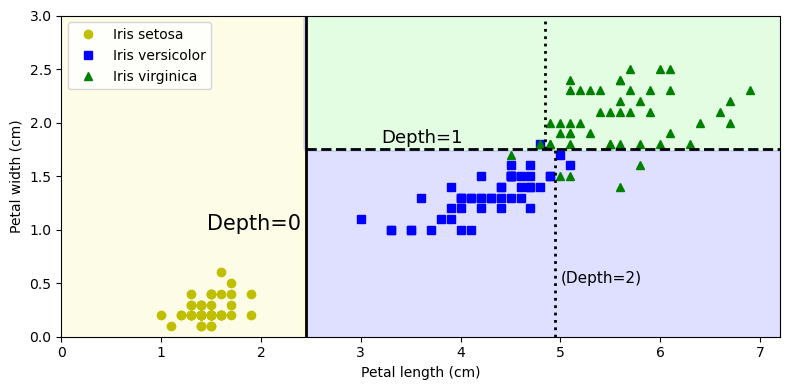

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# extra code – just formatting details
from matplotlib.colors import ListedColormap

# Define três cores (amarelo, azul e verde claro) — uma para cada espécie de flor.
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
# Cria uma nova figura com tamanho 8x4 polegadas.
plt.figure(figsize=(8, 4))

# Cria uma grade (malha) de pontos no espaço 2D — uma combinação de comprimentos e larguras das pétalas.
# np.linspace(0, 7.2, 100) → gera 100 valores de comprimento de pétala.
# np.linspace(0, 3, 100) → gera 100 valores de largura de pétala.
# np.meshgrid combina esses valores formando uma grade de coordenadas (como pixels de uma imagem).
lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))

# Junta (np.c_) os valores da grade em uma matriz com duas colunas: [comprimento, largura].
# ravel() achata a matriz (transforma de 2D para 1D).
# Resultado: uma lista com todos os pontos da grade.
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]

# Usa o modelo tree_clf (árvore de decisão) para prever a classe de cada ponto da grade.
# Depois, reshape(lengths.shape) retorna a forma original da grade (100x100), para poder desenhar 
# no gráfico.
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)


# Cria um mapa colorido com as fronteiras de decisão do modelo.
# Cada cor representa uma classe (espécie de flor).
# alpha=0.3 → transparência (para enxergar os pontos por cima).
# cmap=custom_cmap → usa as cores personalizadas.
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

# Percorre cada classe (setosa, versicolor, virginica) e desenha seus pontos reais.
# style define a cor e o formato dos marcadores:
# "yo" → amarelo com bolinhas
# "bs" → azul com quadrados
# "g^" → verde com triângulos
# O comando plt.plot() desenha os pontos da espécie no gráfico.
# label=f"Iris {name}" → nome da espécie aparece na legenda.
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

# extra code – this section beautifies and saves Figure 6–2
# Treina outra árvore com profundidade 3 (para mostrar mais divisões).
# Acessa os valores de corte (thresholds) de alguns nós da árvore — são as linhas de separação 
# entre as classes.
# Exemplo: “se petal width < 0.8 → classe setosa”.
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()
save_fig("decision_tree_decision_boundaries_plot")

plt.show()